# Introduction

When analysing malware, string extraction is one of the first things to do to briefly extract useful information such as IP address, domains, functions, data, or any other information that has not been removed by the developer.
This short notebook will leverage strings extraction coupled with graph theory to understand and show strings similarity between a set of malware.

# Import

In [1]:
import os
import itertools
import graphviz
import networkx
from networkx.drawing.nx_pydot import write_dot
from IPython.display import Image

# Directory of your Samples

In [2]:
# Path of your samples directory
MAL_DIR_VAR = '/Users/fr0gger/tracker_dtrack/'
MAL_DIR = os.listdir('/Users/fr0gger/tracker_dtrack/')

# Distance threshold
jaccard_threshold = 0.4 # Similarity threshold where 0 means identical and 1 means totally different (default = 0.2).

# Create list 

In [3]:
# Create empty list
sample_exe = []

# Extract PE file from the directory
for sample in MAL_DIR:
    sample_exe.append(MAL_DIR_VAR + sample)

# Print the list of your sample that will be processed
for i in sample_exe:
    print(i)

/Users/fr0gger/tracker_dtrack/ADK0719-5c688d235f057c7b0f6ea0a5ba1d9829
/Users/fr0gger/tracker_dtrack/UK1118-8d4aed9a4f0e1317cdb30c6297e1df6c
/Users/fr0gger/tracker_dtrack/UK0705-b7c3039203278bc289fd3756571bd468
/Users/fr0gger/tracker_dtrack/DK0719-8765888a825223f427756dce79956720
/Users/fr0gger/tracker_dtrack/ADK0519-69d43c9e9160a25d7a16851d565b170a.
/Users/fr0gger/tracker_dtrack/ADK0719-8a6dd4ae2380474773038845ebb00bb0
/Users/fr0gger/tracker_dtrack/DK0719-9c542be96bf5e099445ce103d05d4b69
/Users/fr0gger/tracker_dtrack/ADK1016-2ebb3e170dfeda090c6f94ea81bdc155
/Users/fr0gger/tracker_dtrack/ADK0219-1143d9d8c4d77825054a835dc118ae81
/Users/fr0gger/tracker_dtrack/DK0719-4f8091a5513659b2980cb53578d3f798
/Users/fr0gger/tracker_dtrack/TD0719-d8da33fae924b991b776797ba8cde24c
/Users/fr0gger/tracker_dtrack/ADK0519-59a4fbfdb3dec67cff7ba053577c74e5
/Users/fr0gger/tracker_dtrack/TD0719-file-out-6efbf8ab97f740f07de6e9c8cc189852
/Users/fr0gger/tracker_dtrack/ADK0618-8fa49304e4de43c4b36f3e584752ffa9
/Us

# Strings Comparison

String similarity functions measure how similar two strings are. The unit that measures string similarity is the distance between strings. By setting distance thresholds it is possible to use string metrics to identify similar but different strings. This is a useful property for spotting patterns in binaries.

## Full Strings Correlation

This section will extract all the strings from your list of samples and compare them using the jacquard distance.

In [4]:
graph = networkx.Graph()
malware_attributes = dict()

# Extract strings
def getstrings(fullpath):
    strings = os.popen("strings -e l '{0}'".format(fullpath)).read()
    strings = set(strings.split("\n"))
    return strings

def jaccard(set1,set2):
    intersection = set1.intersection(set2)
    intersection_length = float(len(intersection))
    union = set1.union(set2)
    union_length = float(len(union))
    return intersection_length / union_length

directo = os.listdir(MAL_DIR_VAR)

for file in directo:
    strings = getstrings(MAL_DIR_VAR + file)
    malware_attributes[file] = strings
    #graph.add_node(file, label=file[:10])

# Calculate the jaccard distance for the strings extracted
for malware1, malware2 in itertools.combinations(directo, 2):
    jaccard_index = jaccard(malware_attributes[malware1], malware_attributes[malware2])

    if jaccard_index > jaccard_threshold:
        graph.add_node(malware1, label=malware1[:10],  color='#000000')
        graph.add_node(malware2, label=malware2[:10],  color='#000000')
        graph.add_edge(malware1, malware2, penwidth=1 + (jaccard_index - jaccard_threshold) * 10, color="#990000")

write_dot(graph, 'img/full_strings.dot')

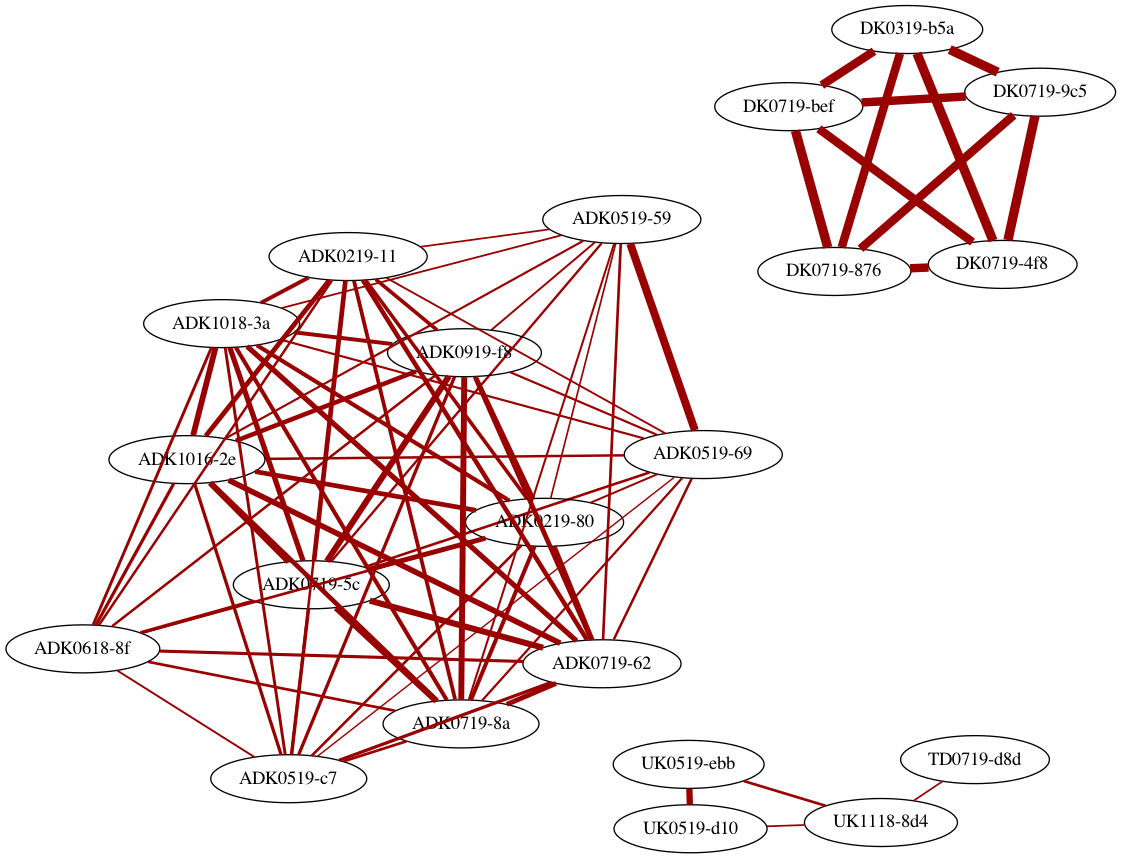

In [5]:
# This part will generate the graph correlation
os.system('fdp -Tpng -o img/full_strings.png img/full_strings.dot')
Image("img/full_strings.png")

## Specific Strings Correlation

In this section we will extract specific strings from the binaries and compare them. The first thing to do is to modify the following variables. 
In the following example, we are looking for strings related to the C2 connexion. 

In [6]:
# VARIABLE TO MODIFY
STRINGS_1 = "dkwero38oerA^t@#"

In [7]:
graph = networkx.Graph()
malware_attributes = dict()

# Get the strings / You can change the default tool "strings" by other such as "Flarestrings" or "floss"
def getstrings(fullpath):
    strings = os.popen("flarestrings '{0}'".format(fullpath)).read()
    strings = set(strings.split("\n"))
    return strings

directo = os.listdir(MAL_DIR_VAR)

# Extract strings from every sample in the directory
for file in directo:
    strings = getstrings(MAL_DIR_VAR + file)
    malware_attributes[file] = strings
    #graph.add_node(file, label=file[:10])

# Compare the STRINGS_1 between samples
for malware1, malware2 in itertools.combinations(directo,2):

    graph.add_node(STRINGS_1, size=4, color='red')
    
    for i in malware_attributes[malware1]:
        if STRINGS_1 in i:
            graph.add_edge(malware1, STRINGS_1, penwidth=1)

    for i in malware_attributes[malware2]:
        if STRINGS_1 in i:
            graph.add_edge(malware2, STRINGS_1, penwidth=1)

write_dot(graph, 'img/specific_strings.dot')

In [8]:
with open("img/specific_strings.dot") as f:
    dot_graph = f.read()

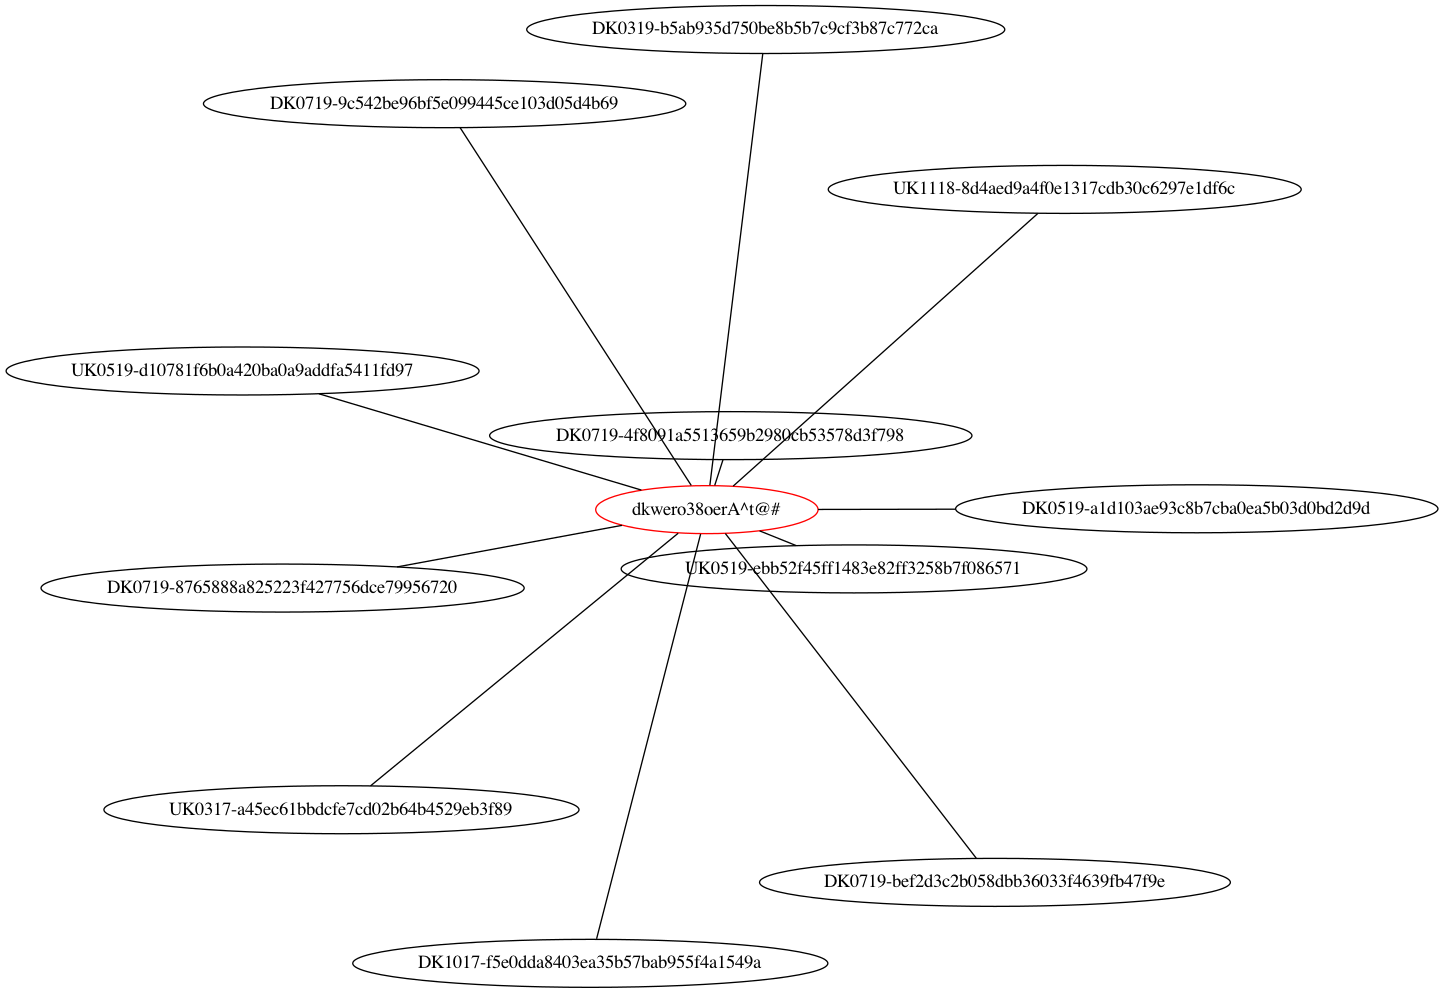

In [9]:
# This part will generate the graph image
os.system('fdp -Tpng -o img/specific_strings.png img/specific_strings.dot')
Image("img/specific_strings.png")

If you like this content you can follow me on Twitter @fr0gger_ for more stuffs such as this one. ❤